In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/job_analytics.csv', parse_dates=True)
df = df.drop(labels=['id', 'offer_id'], axis=1)

In [3]:
#Shape
df.shape

(7934, 108)

In [4]:
cols = df.columns.tolist()

new_cols=[]
for col in cols:
    col = col.replace('_', ' ')
    new_cols.append(col.title())
    
dict_to_repl = dict(zip(cols, new_cols))    

In [5]:
#Converting column names to Lower case
df = df.rename(columns=dict_to_repl)

In [6]:
#Rename  column names for C++, C# to be meaninfull
df = df.rename(columns={'C Pl':'C++', 'C Sh':'C#'})

In [7]:
#Changing the type of Date from object to datetime
df['Date'] = df['Date'].astype('datetime64[ns]')

### We have started monitoring the changes since November 21, 2019.

In [8]:
#Selecting from dataset data for nov/ december 2019
df_dec = df[(df['Date'] >= '2019-11-21') & (df['Date'] <= '2019-12-21')]

In [9]:
df_dec.shape #5043 job listings in total for december

(5043, 108)

In [10]:
#For this analysis we dont need Url, Date and Title columns, reseting index

In [11]:
df_dec = df_dec[df_dec.columns.tolist()[3:]].reset_index(drop=True)

# Overall Trending

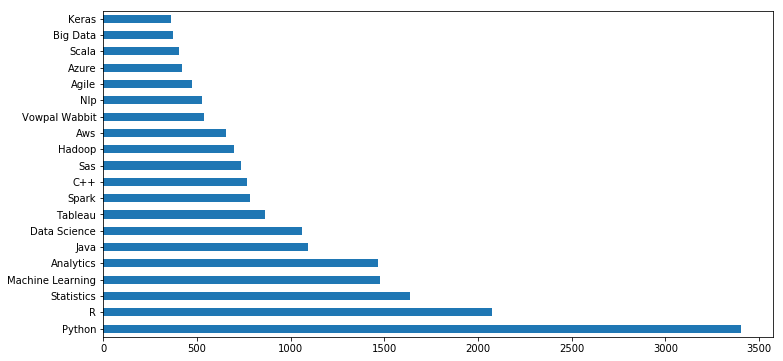

In [12]:
techs = df_dec.apply(sum).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
techs[techs > 100][0:20].plot(kind='barh')

In [13]:
df_dec.head()

,Python,R,C,C++,C#,Java,Javascript,Html5,Perl,Rubi,...,Teradata,Statistics,Machine Learning,Hadoop,Tableau,Elasticsearch,Redis,Apache Spark,Kubernetes,Data Science
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
#Save dataset for decembar
df_dec.to_csv('../datasets/december_2019.csv', index=False )

## 21 November 2019 - 21 December 2019

In [15]:
#Reading dataset
december = pd.read_csv('../datasets/december_2019.csv')

In [16]:
december.head()

,Python,R,C,C++,C#,Java,Javascript,Html5,Perl,Rubi,...,Teradata,Statistics,Machine Learning,Hadoop,Tableau,Elasticsearch,Redis,Apache Spark,Kubernetes,Data Science
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
#Shape Of the data
december.shape

(5043, 105)

In [18]:
#Amazon Web Service have two keywords
#Apache Spark have two keywords
#Matplotlib have two keywords
ws_list = ['Aws','Azure', 'Google Cloud', 'Hortonworks', 'Redshift']
december.rename(columns={'Aws':"a1", 'Amazon Web Service':'a2', 'Matplotlib':'Matplotlib1', "Mllib":"Matplotlib2",
                        'Spark':'Spark1', "Apache Spark":'Spark2'}, inplace= True)
december['Aws'] = december['a1'] + december['a2']
december['Matplotlib'] = december['Matplotlib1'] + december['Matplotlib2']
december['Apache Spark'] = december['Spark1'] + december['Spark2']

In [19]:
pr_lang_list = ['Python', 'R', 'C', 'C++', 'C#', 'Java', 'Javascript', 'Html5', 'Perl','Rubi', 'D Net'] #List of programming Languages
cs_list = ['Aws','Azure', 'Google Cloud', 'Hortonworks', 'Redshift'] #Cloud Storages
software_list = ['Tableau', 'Weka', 'Spss', 'Sas',  'Cognos'] #Software
mlf_list = ['Tensorflow', 'Keras', 'Pytorch', 'Pandas', 'Numpy', 'Scikit Learn', 'Scipy', 'Vowpal Wabbit', 'Torch'] #ML Frameworks
db_list = ['Hbase', 'Impala','Bigquery', 
            'Postgresql', 'Mysql', 'Mongodb', 'Msql', 'Oracle',
            'Nosql']  #Databases
cnt_list = ['Kubernetes', 'Docker'] #Containers
dts_list = ['Apache Spark', 'Hadoop', 'Kafka', 'Druid', 'Hdfs', 'Presto', 'Casandra'] #Distributed sysytems
pr_frames = ['Matplotlib', 'Ggplot2', 'Ggplot', 'Plotly', 'D3'] #Python and R Libraries
domains_list = ['Data Analysis', 'Multivariable Calculus', 'Linear Algebra', 'Algebra', 'Analytics',
          'Statistics','Machine Learning', 'Data Science' ]  #Domains



In [20]:

#Functions

def sort_sum_data(data, items_list):
    """Sort and prepare columns"""
    sorted_ser = data[items_list].apply('sum').sort_values(ascending=False)
    return sorted_ser

def plot_sorted_sr(sort,df=None, kind=None, color= None,main_title=None, xlabel =None, x_tics=None):
    
    ax = sort.plot(kind=kind, figsize=(12,8),color=color, fontsize=13);
    ax.set_alpha(0.65)
    ax.set_title(main_title, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18);
    ax.set_xticks(x_tics)
    

    width = []
    total = df.shape[0]
    print(total)
    for i in ax.patches:
        width.append(i.get_width())
        ax.text(i.get_width()+.3, i.get_y()+.38, \
                str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
    color='dimgrey')

    # invert for largest on top 
    ax.invert_yaxis() 
    print(width)
    
    
    
def plot_bar_pixels(sort, df, main_title= None, xlabel =None, x_tics=None, color='coral'):
    """To display bar size in pixels to keep closest ratio for photoshop"""
    fig, ax = plt.subplots(figsize=(18, 8))
    fig.subplots_adjust(top=0.8)
    ax.tick_params(labelsize=18)
    bars = ax.barh(sort.index, sort.values, color=color)
    #ax.set_alpha(0.85)
    ax.set_title(main_title, fontsize=18, alpha= 0.87)
    ax.set_xlabel(xlabel, fontsize=26);
    r = fig.canvas.get_renderer()
    #Display width in pix
    heights = [bar.get_window_extent(r).width.round() for bar in bars]
    #print(heights) 
    width = []
    total = df.shape[0]
    #print(total)
    for i in ax.patches:
        width.append(i.get_width())
        ax.text(i.get_width()+.3, i.get_y()+.55, \
                str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
    color='dimgrey', alpha=0.8, rasterized=True)    
    ax.invert_yaxis()
    #ax.axis('off')
    plt.savefig('output.pdf', dpi=300)  #Save as pdf
    return heights

# Programming Languages

5043
[3403, 2076, 1093, 765, 211, 189, 109, 14, 13, 0, 0]


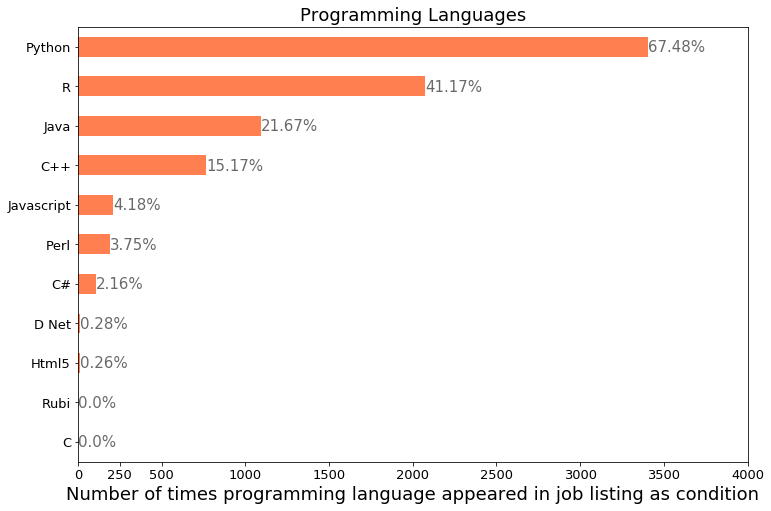

In [21]:
plot_sorted_sr(sort_sum_data(december,pr_lang_list),december, kind='barh', color='coral', x_tics=[0, 250, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000], 
              main_title='Programming Languages', xlabel='Number of times programming language appeared in job listing as condition')

In [22]:
#Togheter Python and R
december[['Python', 'R']].where((december['Python'] == 1) & (december['R'] == 1)).sum()

Python    1845.0
R         1845.0
dtype: float64

In [23]:
#Only Python as requirement
december[['Python', 'R']].where((december['Python'] == 1) & (december['R'] == 0)).sum()

Python    1558.0
R            0.0
dtype: float64

In [24]:
#Only R as requirement
december[['Python', 'R']].where((december['Python'] == 0) & (december['R'] == 1)).sum()

Python      0.0
R         231.0
dtype: float64

# Cloud Storages

5043
[822, 422, 236, 118, 23]


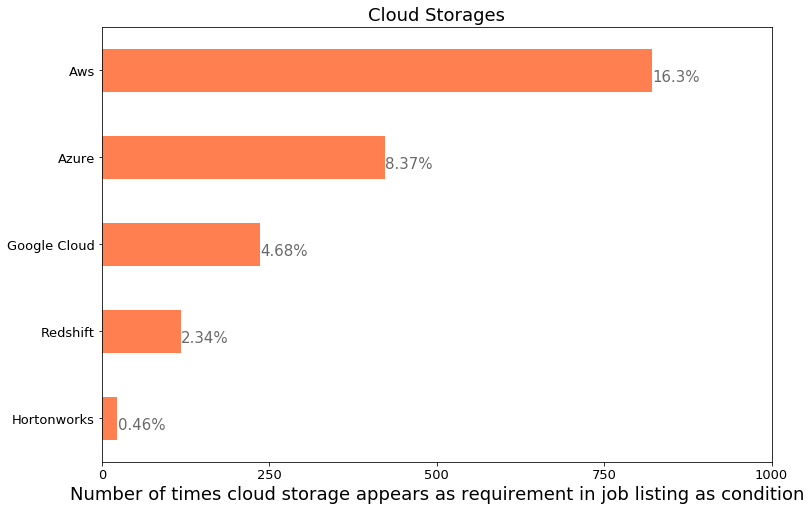

In [25]:
plot_sorted_sr(sort_sum_data(december,cs_list),december, kind='barh', color='coral', x_tics=[0, 250, 500,750, 1000], 
              main_title='Cloud Storages', xlabel='Number of times cloud storage appears as requirement in job listing as condition')

In [26]:
december[['Aws', 'Azure']].where((december['Aws'] == 1) & (december['Azure'] == 0)).sum()

Aws      516.0
Azure      0.0
dtype: float64

# BI Software

5043
[866, 735, 123, 25, 14]


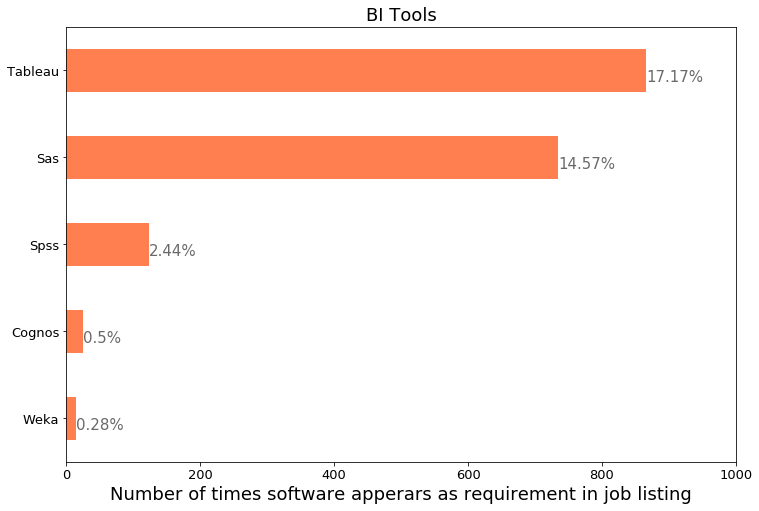

In [27]:
plot_sorted_sr(sort_sum_data(december,software_list),december, kind='barh', color='coral', x_tics=[0, 200, 400, 600, 800, 1000], 
              main_title='BI Tools', xlabel='Number of times software apperars as requirement in job listing')

# ML Frameworks

5043
[538, 363, 306, 275, 270, 177, 42, 38, 5]


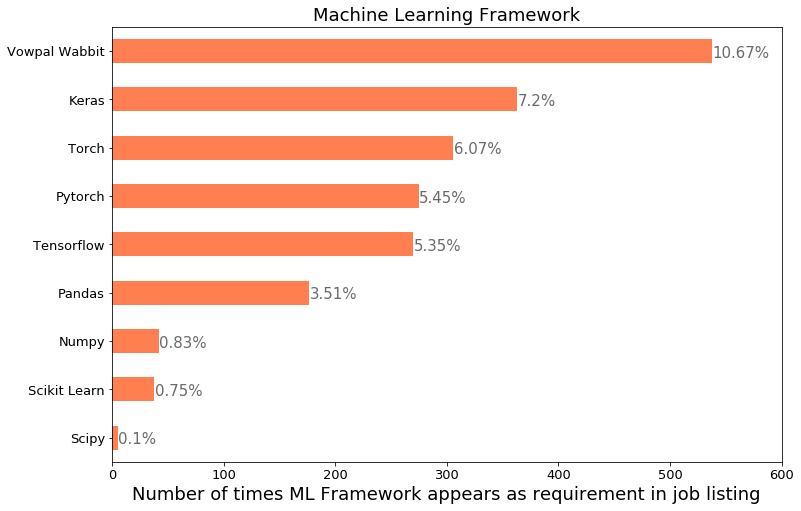

In [28]:
plot_sorted_sr(sort_sum_data(december,mlf_list),december, kind='barh', color='coral', x_tics=[0, 100, 200, 300, 400, 500, 600], 
              main_title='Machine Learning Framework', xlabel='Number of times ML Framework appears as requirement in job listing')

# Databases

5043
[270, 227, 195, 195, 157, 125, 41, 27, 1]


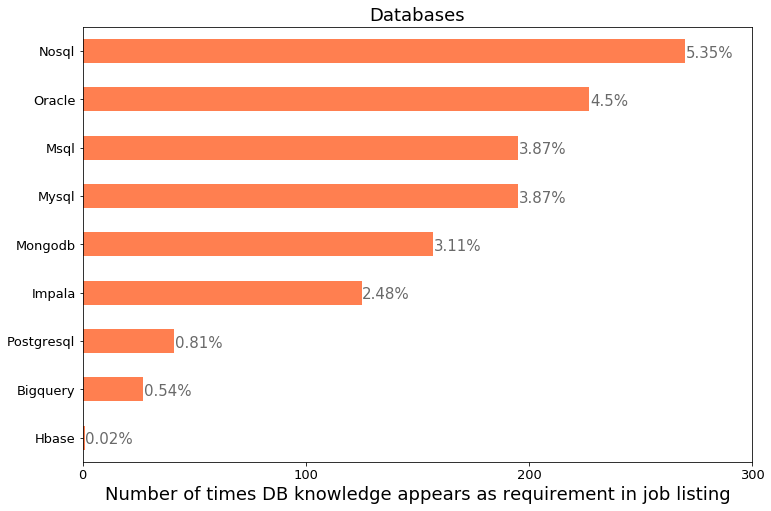

In [29]:
plot_sorted_sr(sort_sum_data(december,db_list),december, kind='barh', color='coral', x_tics=[0,100, 200,300], 
              main_title='Databases', xlabel='Number of times DB knowledge appears as requirement in job listing')

# Containers

5043
[125, 106]


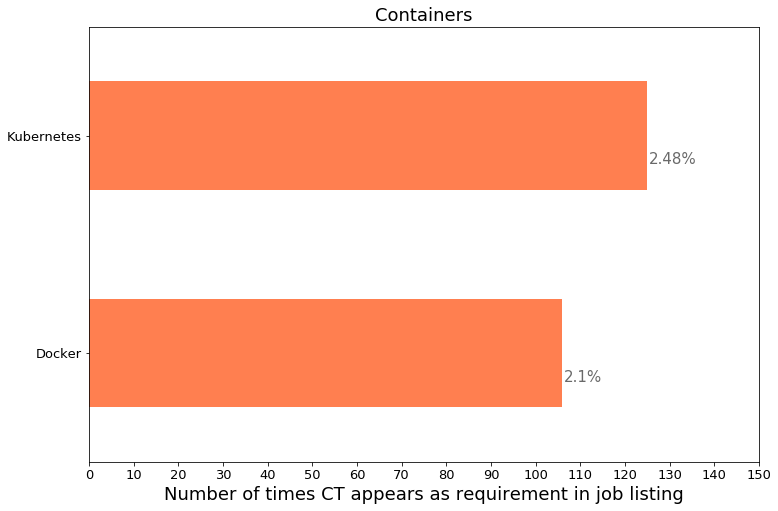

In [30]:
plot_sorted_sr(sort_sum_data(december,cnt_list),december, kind='barh', color='coral', x_tics=[0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150], 
              main_title='Containers', xlabel='Number of times CT appears as requirement in job listing')

# Distributed Systems

5043
[937, 698, 100, 37, 17, 3, 0]


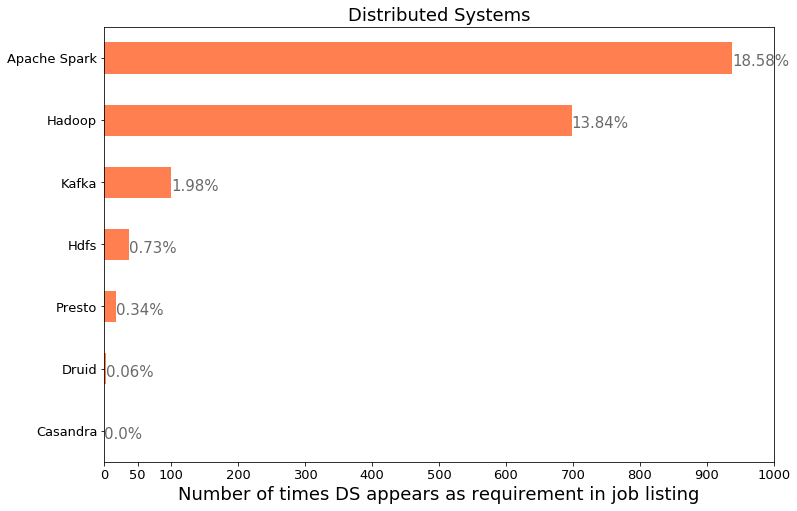

In [31]:
plot_sorted_sr(sort_sum_data(december,dts_list),december, kind='barh', color='coral', x_tics=[0,50, 100,200, 300, 400, 500, 600, 700, 800, 900, 1000], 
              main_title='Distributed Systems', xlabel='Number of times DS appears as requirement in job listing')

# Visualisation Libraries

5043
[275, 112, 58, 24, 15]


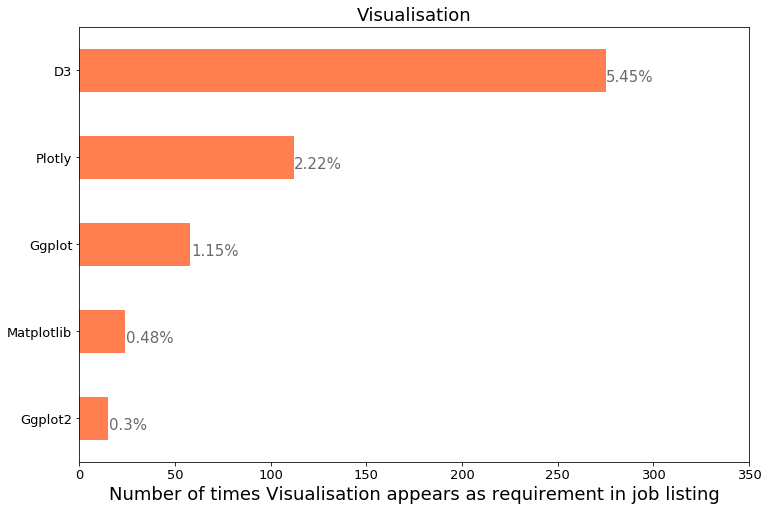

In [32]:
plot_sorted_sr(sort_sum_data(december,pr_frames),december, kind='barh', color='coral', x_tics=[0,50, 100,150, 200, 250, 300, 350], 
              main_title='Visualisation', xlabel='Number of times Visualisation appears as requirement in job listing')

# Particular area of knowledge

5043
[1635, 1476, 1464, 1059, 249, 27, 5, 1]


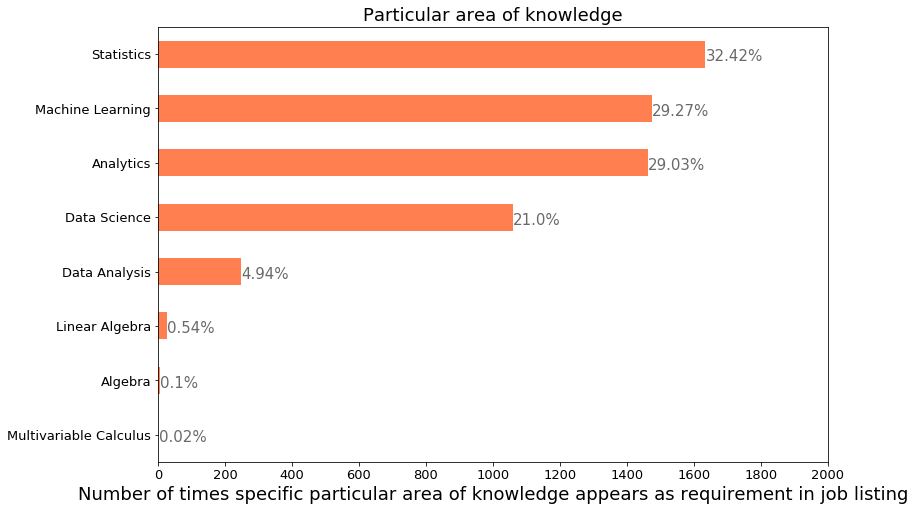

In [33]:
plot_sorted_sr(sort_sum_data(december,domains_list),december, kind='barh', color='coral', x_tics=[0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
              main_title='Particular area of knowledge', xlabel='Number of times specific particular area of knowledge appears as requirement in job listing')

# Additional plot with pixels as output.

[957.0, 584.0, 307.0, 215.0, 59.0, 53.0, 31.0, 4.0, 4.0, 0.0, 0.0]

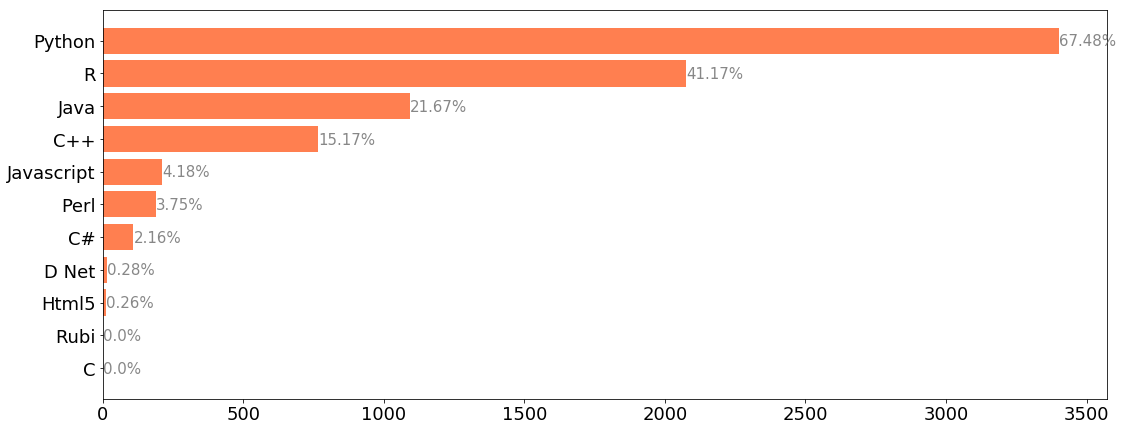

In [34]:
#With pixels
plot_bar_pixels(sort_sum_data(december,pr_lang_list), december, main_title=None)

[957.0, 645.0, 544.0, 489.0, 480.0, 315.0, 75.0, 68.0, 9.0]

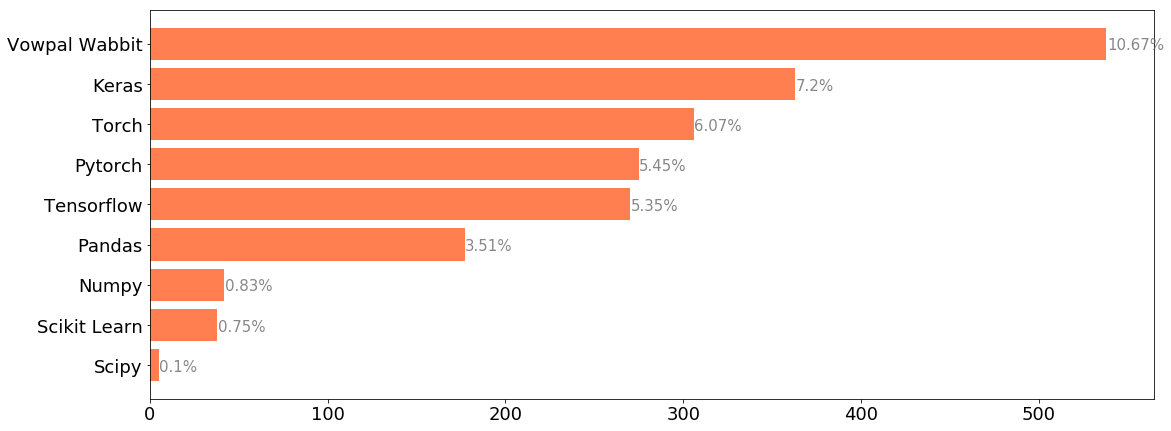

In [35]:
#With pixels
plot_bar_pixels(sort_sum_data(december,mlf_list), december, main_title=None)

# Most frequent word that occurs in job listing title

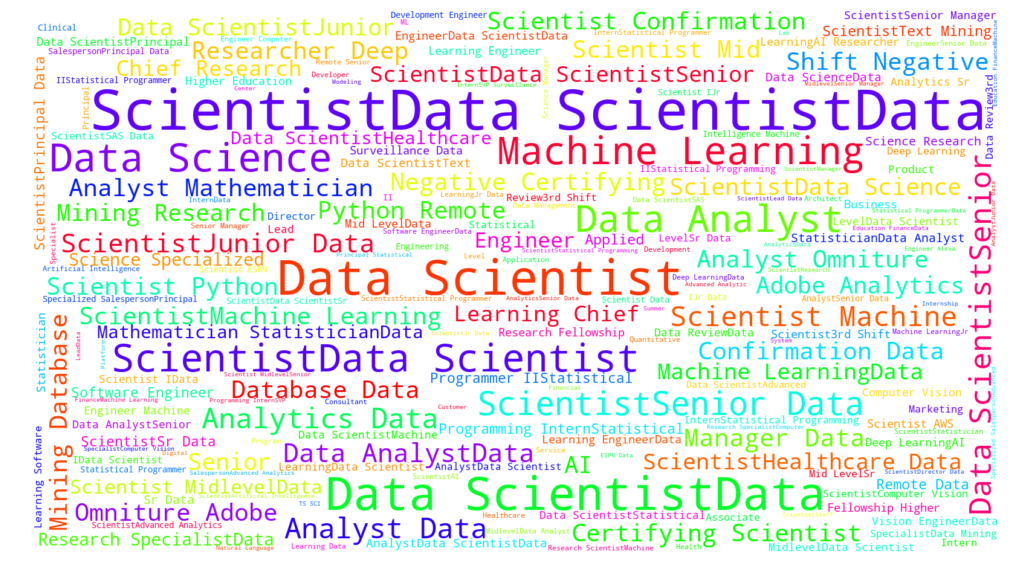

In [36]:
from PIL import Image
from wordcloud import WordCloud #,STOPWORDS, ImageColorGenerator



# Extract titles into string:
tl = df['Title'].values.tolist()
text = ''.join(map(str, tl))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", repeat=False, colormap=mlt.cm.hsv,
                     width=1600, height=900).generate(text)

# Display the generated image:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('cloud.pdf',rasterized=True, dpi=300)  #Save as pdf
plt.show()

# Summary

# What Stands Out